In [80]:
import os
import glob
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For colorbar positioning
from mpl_toolkits.axes_grid1 import make_axes_locatable
# For minor ticks
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib notebook

Load the table resulting from comparing BPMSs

In [14]:
df = pd.read_csv('bpm_comparison.csv')

Set a plot were all 16 BPM bits can be visualized at once. Also, use the BPMDEF table to get it information

In [15]:
bpmdef = {
    'BPMDEF_FLAT_MIN':     1,
    'BPMDEF_FLAT_MAX':     2,
    'BPMDEF_FLAT_MASK':    4,
    'BPMDEF_BIAS_HOT':     8,
    'BPMDEF_BIAS_WARM':   16,
    'BPMDEF_BIAS_MASK':   32,
    'BPMDEF_BIAS_COL':    64,
    'BPMDEF_EDGE':       128,
    'BPMDEF_CORR':       256,
    'BPMDEF_SUSPECT':    512,
    'BPMDEF_FUNKY_COL': 1024,
    'BPMDEF_WACKY_PIX': 2048,
    'BPMDEF_BADAMP':    4096,
    'BPMDEF_NEAREDGE':  8192,
    'BPMDEF_TAPEBUMP': 16384,
}

In [16]:
bpmdef_aux = dict( zip(bpmdef.values(), bpmdef.keys()) )

In [85]:
bpmdef_aux

{1: 'BPMDEF_FLAT_MIN',
 2: 'BPMDEF_FLAT_MAX',
 4: 'BPMDEF_FLAT_MASK',
 8: 'BPMDEF_BIAS_HOT',
 16: 'BPMDEF_BIAS_WARM',
 32: 'BPMDEF_BIAS_MASK',
 64: 'BPMDEF_BIAS_COL',
 128: 'BPMDEF_EDGE',
 256: 'BPMDEF_CORR',
 512: 'BPMDEF_SUSPECT',
 1024: 'BPMDEF_FUNKY_COL',
 2048: 'BPMDEF_WACKY_PIX',
 4096: 'BPMDEF_BADAMP',
 8192: 'BPMDEF_NEAREDGE',
 16384: 'BPMDEF_TAPEBUMP'}

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 7 columns):
ccd           976 non-null int64
bit           976 non-null int64
n_bpm1        976 non-null int64
n_bpm2        976 non-null int64
pcent_bpm1    976 non-null float64
pcent_bpm2    976 non-null float64
diff          976 non-null int64
dtypes: float64(2), int64(5)
memory usage: 53.5 KB


Plot definition

In [94]:
bit2plot = [1, 2, 8, 16, 64, 2048]

In [95]:
list(bpmdef_aux.keys())

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

<IPython.core.display.Javascript object>


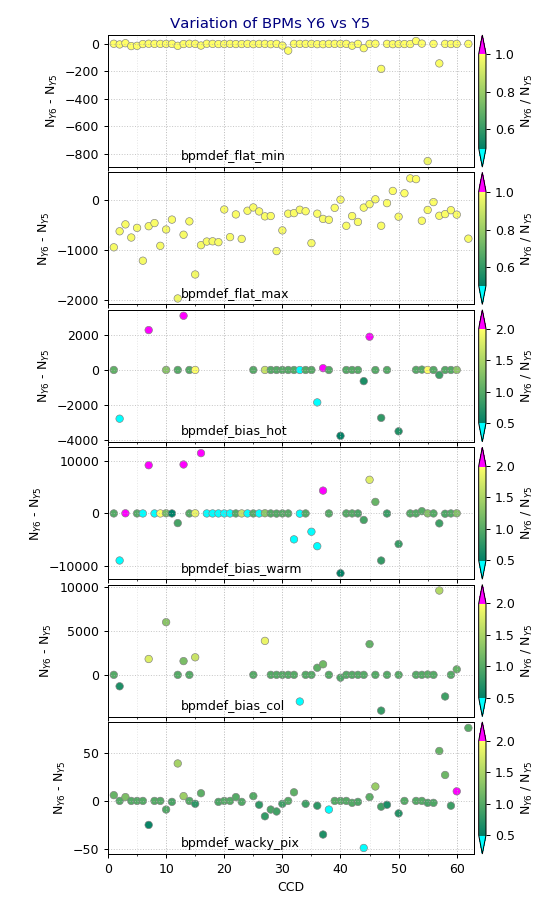

1
2
8
16
64
2048


In [110]:
minor_interval = 5
minorLocator = MultipleLocator(minor_interval)

fig, ax = plt.subplots(6, 1, figsize=(6, 10), sharex=True, sharey=False)
for idx, axis in enumerate(ax.flatten()):
    if (idx < len(bit2plot)):
        # Subselection of dataframe
        dfaux = df.loc[df['bit'] == bit2plot[idx]]
        im = axis.scatter(dfaux['ccd'], dfaux['diff'], 
                          c=dfaux['n_bpm1'] / dfaux['n_bpm2'], 
                          vmax=np.min([np.max(dfaux['n_bpm1'] / dfaux['n_bpm2']), 2]), 
                          vmin=np.min([np.max(dfaux['n_bpm1'] / dfaux['n_bpm2']), 0.5]),
                          cmap='summer',
                          edgecolors='gray',
                          linewidth=0.5,
                          )
        # Create the subgrid for the colorbars
        divider = make_axes_locatable(axis)
        caxis = divider.append_axes('right', size='2%', pad=0.05)
        # For the upper/lower values we use extend
        plt.colorbar(im, cax=caxis, extend='both', extendfrac=0.2, label=r'N$_{Y6}$ / N$_{Y5}$') # or fig.colorbar(im, cax=caxis)
        # Set colors for values outside the colorbar
        im.cmap.set_under('aqua')
        im.cmap.set_over('magenta')
        # Force axis limits
        axis.set_xlim([0, 63])
        # Set minor locator by hand, as a customization
        axis.xaxis.set_minor_locator(minorLocator)
        # Set grid
        axis.grid(which='minor', alpha=0.3, linestyle='dotted')
        axis.grid(which='major', alpha=0.7, linestyle='dotted')
        # Text on plot
        print(bit2plot[idx])
        axis.text(0.2, 0.05, str.lower(bpmdef_aux[bit2plot[idx]]),
                  transform=axis.transAxes)
        # Axis labels
        axis.set_ylabel(r'N$_{Y6}$ - N$_{Y5}$')
    else:
        # If we ant to erase additional frames, use teh following
        axis.axis('off')
# Set xlabel just for last subplot
ax.flatten()[-1].set_xlabel('CCD')
# Fine tuning the spacing
plt.subplots_adjust(left=0.2, bottom=0.05, right=0.9, top=0.96,                         
                    hspace=0.04, wspace=0.7)
# Title for all subplots
plt.suptitle('Variation of BPMs Y6 vs Y5', color='navy')

# Save as pdf
plt.savefig('bpm_Y6vsY5.pdf', format='pdf', dpi=300)